## **Background**
In June 2011, the United Nations General Assembly passed the Bhutanese Resolution, which focuses on giving “more importance to happiness and well-being in determining how to achieve and measure social and economic development” [1]. In April 2012, the United Nations had a meeting regarding the Bhutanese Resolution, during which the first World Happiness Report was shared. The meeting was chaired by the Prime Minister of Bhutan, Jigmi Y. Thinley, and American economist, Jeffrey D. Sachs. It is worth noting that Bhutan, a small and mostly Buddhist country (less than 1 million in population) between India and China, is known for its peacefulness [2]. There has been a world happiness report for almost each year following its debut in 2012. The main source of data for the happiness reports comes from the Gallup World Poll [1]. The poll is conducted via telephone for most countries, and in-person for developing countries. Over 150 countries are covered (only 195 countries in the world). All poll respondents are over the age of 14, and the number of surveys conducted in each country, depending on population, are around 1,000 to 2,000 [3]. According to the https://worldhappiness.report/faq/ , how a country ranks in the world happiness report is based on a single question from the Gallup World Poll: how would you rate your current life? The scale used is called the Cantril ladder, which goes from 0 to 10 with 0 representing the worst possible life and 10 the best. The rankings actually use data from the past two years. The world happiness report tries to explain why countries ranked the way that they did, using statistics based on six factors: levels of GDP, life expectancy, generosity, social support, freedom, and corruption; however, these estimates have no impact on the actual rankings. 

References:
1.	https://happiness-report.s3.amazonaws.com/2020/WHR20.pdf
2.	https://www.forbes.com/sites/tmullen/2018/02/27/why-bhutan-is-still-out-of-this-world/?sh=28c6c8cc44be  
3.	https://www.gallup.com/178667/gallup-world-poll-work.aspx 
4.	https://worldhappiness.report/faq/ 
5.	https://ophi.org.uk/policy/gross-national-happiness-index/#:~:text=Bhutan%20and%20the%20UN%20Resolution,promoting%20sustainable%20happiness%20and%20wellbeing 


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import plotly as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import plotly.express as px
from plotly.offline import iplot
import seaborn as sns

In [3]:
# -- set the filename
fname1 = "/content/drive/MyDrive/math637/2015.csv"
fname2 = "/content/drive/MyDrive/math637/2016.csv"
fname3 = "/content/drive/MyDrive/math637/2017.csv"
fname4 = "/content/drive/MyDrive/math637/2018.csv"
fname5 = "/content/drive/MyDrive/math637/2019.csv"
fname6 = "/content/drive/MyDrive/math637/2020.csv"

# -- read the csv into a DataFrame
data_2015 = pd.read_csv(fname1)
data_2016 = pd.read_csv(fname2)
data_2017 = pd.read_csv(fname3)
data_2018 = pd.read_csv(fname4)
data_2019 = pd.read_csv(fname5)
data_2020 = pd.read_csv(fname6)

In [4]:
data_2017.head()

Country  ...  Dystopia.Residual
0       Norway  ...           2.277027
1      Denmark  ...           2.313707
2      Iceland  ...           2.322715
3  Switzerland  ...           2.276716
4      Finland  ...           2.430182

[5 rows x 12 columns]

## **Generally speaking, have countries' happiness improved or worsened over the last 5 years?**

In [5]:
data_2015 = data_2015.rename({'Happiness Score': '2015 Happiness Score'}, axis=1) 
data_2016 = data_2016.rename({'Happiness Score': '2016 Happiness Score'}, axis=1) 
data_2017 = data_2017.rename({'Happiness.Score': '2017 Happiness Score'}, axis=1) 
data_2018 = data_2018.rename({'Score': '2018 Happiness Score'}, axis=1) 
data_2019 = data_2019.rename({'Score': '2019 Happiness Score'}, axis=1) 
data_2020 = data_2020.rename({'Ladder score': '2020 Happiness Score'}, axis=1) 

In [6]:
data_merged = pd.merge(left=data_2015, right=data_2016, left_on='Country', right_on='Country', how='outer')
data_merged = pd.merge(left=data_merged, right=data_2017, left_on='Country', right_on='Country', how='outer')
data_merged = pd.merge(left=data_merged, right=data_2018, left_on='Country', right_on='Country or region', how='outer')
data_merged = pd.merge(left=data_merged, right=data_2019, left_on='Country', right_on='Country or region', how='outer')
data_merged = pd.merge(left=data_merged, right=data_2020, left_on='Country', right_on='Country name', how='outer')

In [7]:
nan_rows = data_merged[data_merged.isnull().T.any().T]

In [ ]:
nan_rows

In [9]:
data_merged_clean = data_merged.dropna()

In [10]:
data_merged_clean.head()

Country  ... Dystopia + residual
0  Switzerland  ...            2.350267
1      Iceland  ...            2.460688
2      Denmark  ...            2.432741
3       Norway  ...            2.168266
4       Canada  ...            2.195269

[5 rows x 73 columns]

In [11]:
rank_columns = data_merged_clean[["2015 Happiness Score", "2016 Happiness Score", "2017 Happiness Score", "2018 Happiness Score", "2019 Happiness Score", "2020 Happiness Score"]]

In [12]:
svals = rank_columns.values

In [13]:
years = np.arange(2015, 2021)

In [14]:
# -- initialize the figure
fig, ax = plt.subplots(figsize=(15, 7))

# -- plot all countries with a "heatmap"
im = ax.imshow(svals, aspect="auto")

# # -- set the x-axis ticks to be years
xt = np.array([0, 1, 2, 3, 4, 5])
ax.set_xlim(1, 5)
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels("")

# -- set the axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Country")

# -- set the colorbar and label
fig.colorbar(im)

# -- show the figure
fig.show()

According to the above heatmap, is looks as though most countries' happiness scores remained relatively level over the past 5 years. 

In [15]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(svals)
 
    distortions.append(sum(np.min(cdist(svals, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / svals.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(svals, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / svals.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [16]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.3431399335747005
2 : 1.4080663635360546
3 : 1.0049719123074201
4 : 0.8477938667120155
5 : 0.7370193515814061
6 : 0.648827004663593
7 : 0.6015874320585168
8 : 0.5701339730863119
9 : 0.5418489615712964


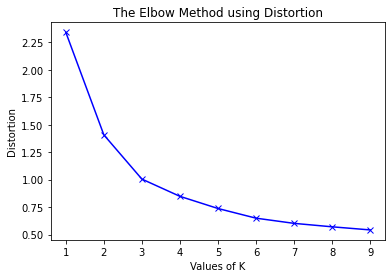

In [17]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [18]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1024.345295324978
2 : 349.3703424292773
3 : 165.42500205973096
4 : 123.87308331436753
5 : 87.91478928413748
6 : 71.59443330691937
7 : 61.2463772000354
8 : 54.52487259538043
9 : 50.52409890020927


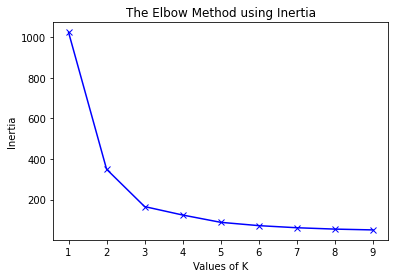

In [19]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [20]:
km = KMeans(n_clusters=6, random_state=2)
km.fit(svals)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [22]:
ind_0 = km.labels_ == 0
ind_1 = km.labels_ == 1
ind_2 = km.labels_ == 2
ind_3 = km.labels_ == 3
ind_4 = km.labels_ == 4
ind_5 = km.labels_ == 5

In [23]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

ax1.plot(years, svals[ind_0].T, lw=0.2, c="k") 
ax1.plot(years, km.cluster_centers_.T[:, 0], c="r") 
ax2.plot(years, svals[ind_1].T, lw=0.2, c="k") 
ax2.plot(years, km.cluster_centers_.T[:, 1], c="r") 
ax3.plot(years, svals[ind_2].T, lw=0.2, c="k") 
ax3.plot(years, km.cluster_centers_.T[:, 2], c="r") 
ax4.plot(years, svals[ind_3].T, lw=0.2, c="k") 
ax4.plot(years, km.cluster_centers_.T[:, 3], c="r") 
ax5.plot(years, svals[ind_4].T, lw=0.2, c="k") 
ax5.plot(years, km.cluster_centers_.T[:, 4], c="r") 
ax6.plot(years, svals[ind_5].T, lw=0.2, c="k") 
ax6.plot(years, km.cluster_centers_.T[:, 5], c="r") 

ax1.set_title(len(svals[ind_0]))
ax2.set_title(len(svals[ind_1]))
ax3.set_title(len(svals[ind_2]))
ax4.set_title(len(svals[ind_3]))
ax5.set_title(len(svals[ind_4]))
ax6.set_title(len(svals[ind_5]))

fig.tight_layout(pad=3.0)
fig.show()

In [ ]:
In the first graph above

## **What do the happiness scores look like broken down by region?**

In [30]:
# information to be given when mouse is over a country
hover_data = data_2020[["2020 Happiness Score","Logged GDP per capita"]]

fig = px.choropleth(data_2020,
                    locations=data_2020["Country name"],
                    locationmode="country names",
                    projection="natural earth",
                    hover_data=hover_data,
                    hover_name=data_2020["Country name"],
                    color="2020 Happiness Score",
                    color_continuous_scale="Aggrnyl",
                    scope="world")
fig.show()

Based on the above choropleth, it appears as though the western side of the world is generally happier than the the eastern side, with the exception of Europe and Australia/New Zealand. It appears that for the most part, Africa and Asia are not as happy as the rest of the world.

In [31]:
fname7 = "/content/drive/MyDrive/math637/population_by_country_2020.csv"

# -- read the csv into a DataFrame
population = pd.read_csv(fname7)

In [32]:
happy_pop_2020 = pd.merge(left=data_2020, right=population, left_on='Country name', right_on='Country (or dependency)', how='outer')

In [33]:
happy_pop_2020 = happy_pop_2020.dropna()

## **How happy is most of the world in terms of population?**

In [34]:
# regions
regions = list(happy_pop_2020["Regional indicator"].unique()) 
# happiness rates of regions
regions_happiness_rate = []
# total population
total_pop = [] 

for i in regions:
    x = happy_pop_2020[happy_pop_2020["Regional indicator"] == i]
    happiness_rate = sum(x["2020 Happiness Score"]) / len(x)
    regions_happiness_rate.append(happiness_rate) # add list
    total_pop.append(sum(x["Population (2020)"]/100000))  # number of countries add

In [35]:
#Create figure
fig, ax = plt.subplots(figsize = (20,10))

scatter = ax.scatter(regions, regions_happiness_rate, alpha = 0.5, s = total_pop, c=total_pop, cmap="Set1")

legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Approximate Population [in 100,000s]")
ax.add_artist(legend)

ax.set_xlim(-0.5, 10.5)
ax.set_ylim(4, 7.5)
plt.xticks([])
plt.ylabel("Happiness Score [0-10]")

#For each point, we add a text inside the bubble
for num in range(0, len(regions)):
     ax.text(regions[num], regions_happiness_rate[num], regions[num], horizontalalignment='center', size='medium', color='black')
  
plt.show()

Based on the above bubble plot, the most populated region in the world, South Asia, is also one of the unhappiest regions. And most regions of the world are experiencing happiness levels between 5 and 6.5.

In [36]:
happy_pop_2020["rounded score"] = happy_pop_2020["2020 Happiness Score"].round()

In [37]:
group = happy_pop_2020.groupby('rounded score')

In [38]:
# total population
group_pop = [] 

for i in range(3, 9):
    x = happy_pop_2020[happy_pop_2020["rounded score"] == i]
    group_pop.append(sum(x["Population (2020)"]))

In [39]:
group_array = np.array(group_pop)

In [40]:
group_array = group_array / 1000000

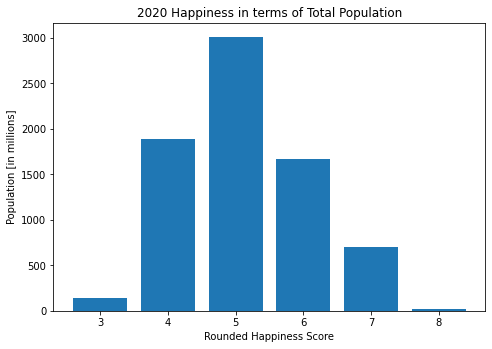

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = '3', '4', '5', '6', '7', '8'
ax.bar(labels, group_array)
plt.xlabel('Rounded Happiness Score')
plt.ylabel('Population [in millions]')
plt.title("2020 Happiness in terms of Total Population") 
plt.show()

According to the above graph, most of the world is experiencing a happiness level of around a 4 or 5, with a large amount of people experiencing a happiness level around a 6. A very small portion of the world is experiencing a happiness level of around an 8. Fortunately, a small portion of the world is experiencing a happiness level of around a 3. 